# Домашнее задание 6. Визуализация данных в Python

**Домашнее задание состоит из восьми задач, которые вам нужно решить.**

* За каждую выполненную без ошибок задачу вы полные баллы.
* Если задача решена частично или с некритичной ошибкой, вы можете получить до половины баллов.
* За нерешенную или решенную неверно задачу баллы не ставятся.

**Инструкция:** выполните задания в этом же ноутбуке (места под решения каждой задачи обозначаются как **#НАЧАЛО ВАШЕГО РЕШЕНИЯ** и **#КОНЕЦ ВАШЕГО РЕШЕНИЯ**).

**Перед выполнением задания:**
* Перезапустите ядро (restart the kernel): в меню выбрать Ядро (Kernel) → Перезапустить (Restart).
* Выполните все ячейки (run all cells): в меню выбрать Ячейка (Cell) → Запустить все (Run All).


## Введение

Банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого необходимо выяснить основные причины их оттока. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как связаны различные признаки, описывающие клиентов.

После разведывательного анализа, с целью выявления наиболее важных факторов оттока, банк сможет построить модель машинного обучения для прогнозирования ухода клиента.


**Описание столбцов датасета**:

| Название столбца     | Описание                                                                 |
|----------------------|--------------------------------------------------------------------------|
| CustomerId           | Идентификатор клиента                                                    |
| Surname              | Фамилия клиента                                                          |
| CreditScore          | Кредитный рейтинг клиента (чем выше, тем надёжнее клиент)                |
| Geography            | Страна клиента (банк международный)                                      |
| Gender               | Пол клиента                                                              |
| Age                  | Возраст клиента                                                          |
| Tenure               | Сколько лет клиент пользуется услугами банка                             |
| Balance              | Баланс на счетах клиента в банке                                         |
| NumOfProducts        | Количество услуг банка, которые приобрёл клиент                          |
| HasCrCard            | Есть ли у клиента кредитная карта (1 — да, 0 — нет)                      |
| IsActiveMember       | Статус активного клиента (1 — да, 0 — нет)                               |
| EstimatedSalary      | Предполагаемая заработная плата клиента                                  |
| Exited               | Статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)              |

**Советы по выполнению**:
* Для построения графиков используйте библиотеки [Matplotlib](https://matplotlib.org/), [Seaborn](https://seaborn.pydata.org/) или [Plotly](https://plotly.com/python/).
* К каждому заданию обязательно постройте хотя бы один график и запишите выводы, которые можно сделать на его основе.
* Перед началом обязательно определите, какие признаки являются числовыми, а какие категориальными, чтобы правильно выбрать тип визуализации.


In [2]:
# Ячейка для выгрузки необходимых библиотек
# Дополняйте ее по своим возможностям и потребностям
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки графиков
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

In [3]:
from google.colab import drive
drive.mount("content/")

Mounted at content/


In [28]:
# Чтение данных
df = pd.read_csv('/content/content/MyDrive/МФТИ/Python/ДЗ 6 21 12/bank_clients.csv')
print(df.shape)
df.head()

(2509, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
1,16,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0
2,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
3,27,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0
4,29,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        2509 non-null   int64  
 1   CustomerId       2509 non-null   int64  
 2   Surname          2509 non-null   object 
 3   CreditScore      2509 non-null   int64  
 4   Geography        2509 non-null   object 
 5   Gender           2509 non-null   object 
 6   Age              2509 non-null   int64  
 7   Tenure           2509 non-null   int64  
 8   Balance          2509 non-null   float64
 9   NumOfProducts    2509 non-null   int64  
 10  HasCrCard        2509 non-null   int64  
 11  IsActiveMember   2509 non-null   int64  
 12  EstimatedSalary  2509 non-null   float64
 13  Exited           2509 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 274.6+ KB


In [6]:
# преобразовываю "RowNumber" и "CustomerId" к типу object
columns_tochange_type = ["RowNumber", "CustomerId"]
for col in columns_tochange_type:
  df[col] = df[col].astype("object")

df[["RowNumber", "CustomerId"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RowNumber   2509 non-null   object
 1   CustomerId  2509 non-null   object
dtypes: object(2)
memory usage: 39.3+ KB


In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2509.000000,2509.000000,2509.000000,2509.000000,2509.000000,2509.00000,2509.000000,2509.000000,2509.000000
mean,651.453567,39.771622,5.009964,119730.116134,1.519729,0.71383,0.497409,101113.435102,0.324432
std,98.168937,10.519143,2.935154,27022.006157,0.619420,0.45206,0.500093,58263.011501,0.468256
min,350.000000,18.000000,0.000000,27288.430000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,2.000000,102800.720000,1.000000,0.00000,0.000000,51016.020000,0.000000
50%,651.000000,38.000000,5.000000,119703.100000,1.000000,1.00000,0.000000,102397.220000,0.000000
75%,722.000000,45.000000,8.000000,137560.380000,2.000000,1.00000,1.000000,151083.800000,1.000000
max,850.000000,84.000000,10.000000,214346.960000,4.000000,1.00000,1.000000,199970.740000,1.000000


In [8]:
import plotly.express as px
import matplotlib.pyplot as plt

grouped_customers_by_creditscore = pd.DataFrame(df[["CustomerId", "CreditScore"]].groupby("CreditScore")["CustomerId"].count().rename("NumCustomers").sort_values(ascending=False))
grouped_customers_by_creditscore.reset_index(inplace=True)

# Строю гистограмму "Распределение параметра Credit score"
px.histogram(data_frame=grouped_customers_by_creditscore, x="CreditScore", y="NumCustomers")

## Задание 1 (12 баллов)
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [9]:
#НАЧАЛО ВАШЕГО РЕШЕНИЯ

"""
Exited	Статус лояльности
 - 1 — ушедший клиент
 - 0 — лояльный клиент)
"""

churn_loyal_customers = df[["CustomerId", "Exited"]].groupby(by="Exited").agg(num_customers=("CustomerId", "count"))

# вычисление коэффициента ratio_churn_loyal "ушедшие-лояльные клиенты"
ratio_churnloyal_customers = (churn_loyal_customers[churn_loyal_customers.index==1].num_customers.values / churn_loyal_customers[churn_loyal_customers.index==0].num_customers.values)[0].round(2)
print(f"Соотношение ушедших к лояльным клиентам Банка находится на уровне {ratio_churnloyal_customers * 100}%")

#КОНЕЦ ВАШЕГО РЕШЕНИЯ

Соотношение ушедших к лояльным клиентам Банка находится на уровне 48.0%


**Выводы:**


*   соотношение ушедших и лояльных клиентов показывает, что на каждого лояльного клиента приходится ~ 1 ушедший.
* Это значение может говорить о балансовом состоянии двух подклассов: "ушедшие", "лояльные"




In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

bar_fig = px.bar(x=churn_loyal_customers.index, y=churn_loyal_customers["num_customers"],
                 title="Соотношение ушедших и лояльных клиентов Банка",
                 width=500, height=500,
                 color=["loyal", "churn"]
                 )

# plt.xticks(["ушедшие", "лояльные"])
bar_fig.show()

# pie_fig =px.pie(values=churn_loyal_customers["num_customers"],
#                 names=["loyal", "churn"],
#                 title="Доли каждого класса в клиентской базе Банка",
#                 width=500, height=500,
#                 color=["loyal", "churn"])

# pie_fig.show()
# --------- BAR ------------
# изменить цвета классов
# прописать ховер: имя класса, доля и абсолютное значение
# --------- PIE ------------
# изменить цвета классов
# добавить имена столбцов
# градуирование по оси y должно быть с шагом 250/500 пунктов
# прописать ховер: доля клиентов в баре, имя бара

## Задание 2 (12 баллов)
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

**Гипотеза**
> -------H_0---------<br>
распределение балансов клиентов Банка, на счете которых > 2 500 USD, подчиняется нормальному распределению<br>

> --------H_1--------<br>
распределение балансов клиентов Банка, на счете которых > 2 500 USD, описывается не нормальным распределению<br>

Применю как визуальный, так и строгие статистические тесты для проверки базовой гипотезы о распределении

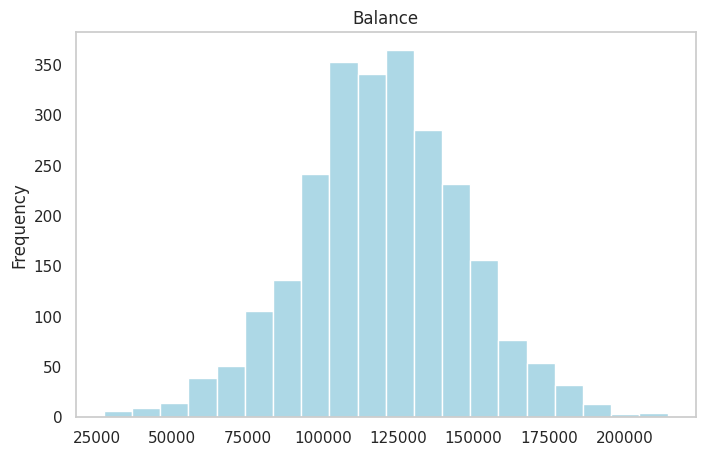

коэф-нт вариации variance: 22.57
коэф-нт ассиметрии skew: -0.04
эксцесс kurtosis: 0.33



In [11]:
#НАЧАЛО ВАШЕГО РЕШЕНИЯ
selected_data = df.query("Balance > 2500")[["CustomerId", "Balance"]]

from matplotlib import pyplot as plt
selected_data['Balance'].plot(kind='hist', bins=20, title='Balance', color="lightblue")
plt.grid(False)
plt.show()

variance_coef = round(selected_data["Balance"].std() / selected_data["Balance"].mean() * 100, 2)
skew = selected_data["Balance"].skew() # коэф.ассиметрии
kurtosis = selected_data["Balance"].kurtosis() # эксцесс
variance_coef, skew, kurtosis

print(f"коэф-нт вариации variance: {variance_coef}\nкоэф-нт ассиметрии skew: {skew:.2f}\nэксцесс kurtosis: {kurtosis:.2f}\n")
#КОНЕЦ ВАШЕГО РЕШЕНИЯ


**Замечание**
* **коэф-нт вариации** показывает умеренную изменичивать балансов относительно среднего баланса
* **коэф-нт ассиметрии** показывает левосторонний перекос влево, однако полученное значение skew (|-0.04| < 0.5) говорит о низком уровне ассиметрии распределения
* **коэф-нт эксцесса** (kurtosis = 0.33) характеризует нормальные хвосты



------------------------------
**v** Дополнительные графики для оценки формы и характеристик распределения параметра Balance

------------------------------

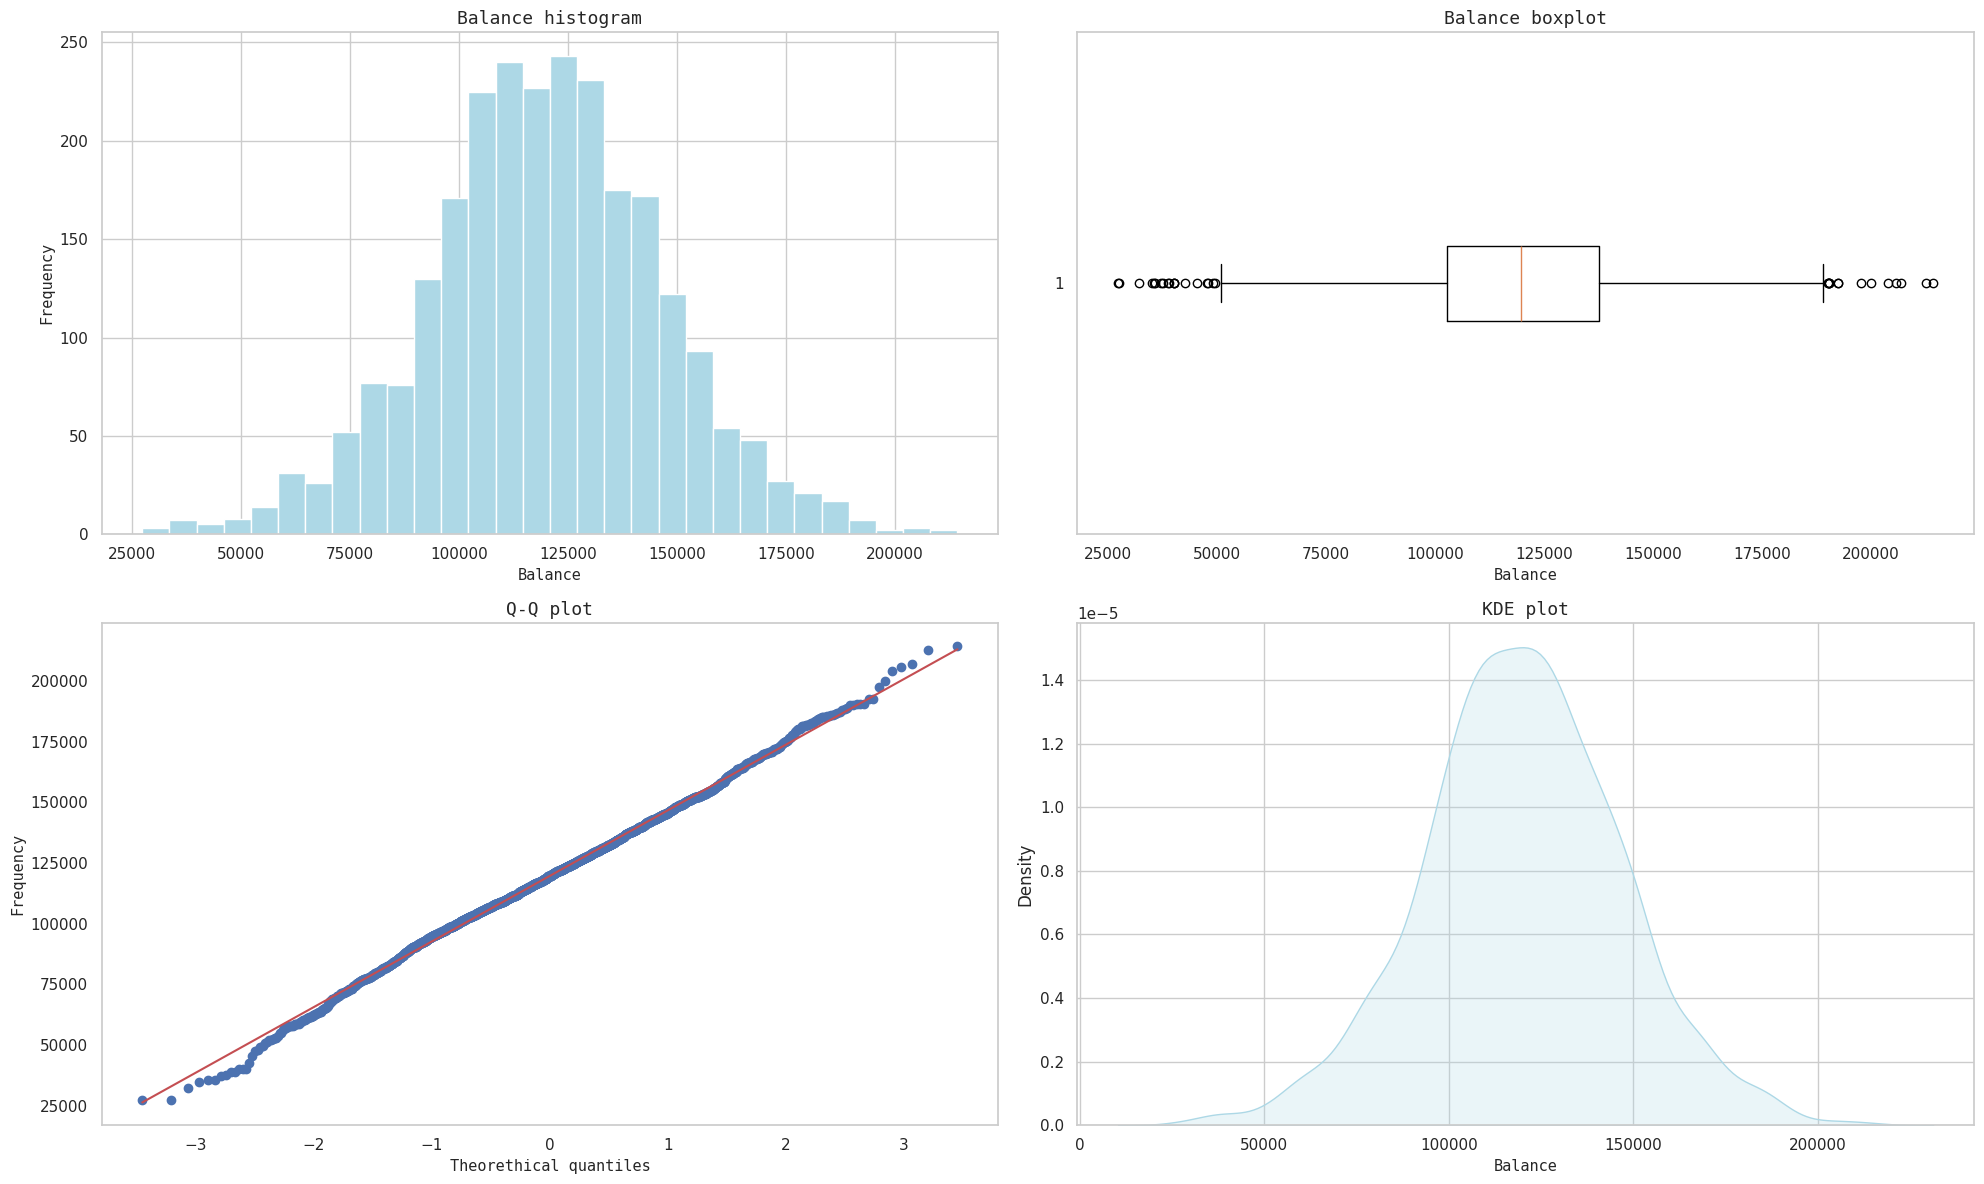

In [12]:
from scipy import stats
fig, axes = plt.subplots(2,2, figsize=(20, 12))

# гистограмма с KDE
axes[0,0].hist(selected_data["Balance"], bins=30, color="lightblue")
axes[0,0].set_title("Balance histogram", font='Monospace', size=13)
axes[0,0].set_xlabel("Balance", font='Monospace', size=11), axes[0,0].set_ylabel("Frequency", font='Monospace', size=11)


axes[0,1].boxplot(selected_data["Balance"], vert=False)
axes[0,1].set_title("Balance boxplot", font='Monospace', size=13)
axes[0,1].set_xlabel("Balance", font='Monospace', size=11)
axes[0,1].grid(False)

stats.probplot(selected_data["Balance"], dist="norm", plot=axes[1,0])
axes[1,0].set_title("Q-Q plot", font='Monospace', size=13)
axes[1,0].set_xlabel("Theorethical quantiles",font='Monospace', size=11)
axes[1,0].set_ylabel("Frequency", font='Monospace', size=11)
axes[1,0].grid(False)

sns.kdeplot(selected_data["Balance"], ax=axes[1, 1], fill=True, color="lightblue")
axes[1,1].set_title("KDE plot", font='Monospace', size=13)
axes[1,1].set_xlabel("Balance", font='Monospace', size=11)


plt.tight_layout()
plt.show()

In [13]:
# чекинг на нормальное распределение по балансу
from scipy import stats
shapiro_stat, shapiro_p = stats.shapiro(selected_data["Balance"])

if shapiro_p < .05:
  print("H0 отклоняю\nРаспределение балансов >=2.5$ не подчиняется нормальному распредедению")
else:
  print("H0 не отклоняю")

H0 отклоняю
Распределение балансов >=2.5$ не подчиняется нормальному распредедению


**Наблюдения**
- мультимодальность на отрезке [100k, 150k]
- ассиметрия распределения влево (mean < median // 119 730.2 < 119 703.1)
- межквартильный размах составляет ~ 34 760.0
- в обоих хвостах распределения имеются выбросы

**Выводы**
 - распределение балансов клиентов со счетом выше 2.5k$ описывается не нормальным распределением

### Анализ распределения балансов клиентов, на счете которых > 2.5k$ в разрезе лояльных и ушедших клиентов

In [14]:
#НАЧАЛО ВАШЕГО РЕШЕНИЯ

"""
Анализ распределения: исследование на уровне групп клиентов Банка
Группы:
  + 1-группа: ушедшие
  + 2-я группа: лояльные
"""

churn_customers, loyal_customers = df.query("Exited==1"), df.query("Exited==0")
display(churn_customers.head()), display(loyal_customers.head())


from plotly import express as px
from plotly.subplots import make_subplots

churned_customers_with_balance_up_2500usd = churn_customers.query('Balance>2500')[["Balance"]].sort_values("Balance", ascending=True)
loyal_customers_with_balance_up_2500usd = loyal_customers.query('Balance>2500')[["Balance"]].sort_values("Balance", ascending=True)


# print(f"ХАРАКТЕРИСТИКИ BALANCE ушедших клиентов")
# display(churned_customers_with_balance_up_2500usd.describe())
# print(f"ХАРАКТЕРИСТИКИ BALANCE лояльных клиентов")
# display(loyal_customers_with_balance_up_2500usd.describe())



figure = make_subplots(rows=1, cols=2, subplot_titles=("Ушедшие клиенты (Balance > 2.5k USD)","Лояльные клиенты (Balance > 2.5k USD)"))

# гистограмма распредления частоты счетов с балансом > 2.5k USD в группе ушедших клиентов
figure_churn_customers = px.histogram(data_frame=churned_customers_with_balance_up_2500usd, nbins=30)

# гистограмма распредления частоты счетов с балансом > 2.5k USD в группе лояльных клиентов
figure_loyal_customers = px.histogram(data_frame=loyal_customers_with_balance_up_2500usd, nbins=30)

for trace in figure_churn_customers.data:
    figure.add_trace(trace, row=1, col=1)
for trace in figure_loyal_customers.data:
    figure.add_trace(trace, row=1, col=2)

figure.update_layout(height=400, width=1000, showlegend=False)
figure.show()


#КОНЕЦ ВАШЕГО РЕШЕНИЯ

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
2,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
8,47,15602280,Martin,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1
9,48,15771573,Okagbue,637,Germany,Female,39,9,137843.80,1,1,1,117622.80,1
14,54,15702298,Parkhill,655,Germany,Male,41,8,125561.97,1,0,0,164040.94,1


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,16,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0
3,27,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0
4,29,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0
5,33,15750181,Sanderson,553,Germany,Male,41,9,110112.54,2,0,0,81898.81,0
6,40,15585768,Cameron,582,Germany,Male,41,6,70349.48,2,0,1,178074.04,0


In [15]:
import plotly.express as px

df_plot = df.query("Balance > 2500")

fig = px.histogram(
    df_plot,
    x="Balance",
    color="Exited",
    nbins=30,
    barmode="overlay",
    opacity=0.6,
    title="Сравнение распределений Balance (Balance > 2.5k USD)"
)

fig.update_layout(
    xaxis_title="Balance, USD",
    yaxis_title="Количество счетов"
)

fig.show()


Распредление внешне выглядит колокообразным, однако  наблюдается небольшая ассиметрия данных (перекос балансов влево).

Строю гистограмму  со сглаживающей кривой KDE (оценка функции плотности вероятности данных) для более детальной визуализации распределения

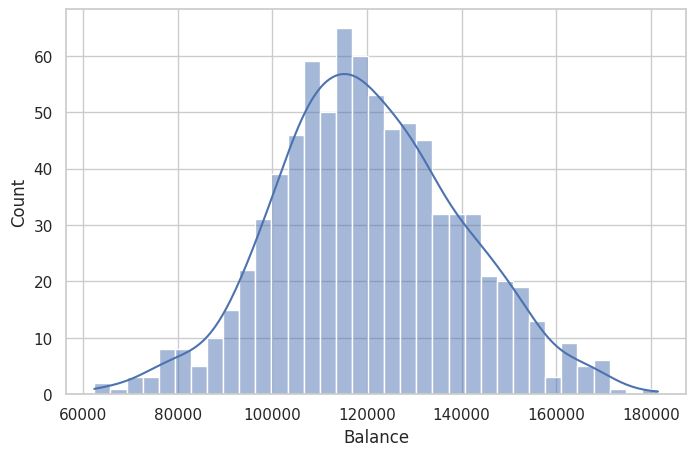

In [16]:
import seaborn as sns

churn_hist_plt = sns.histplot(churn_customers["Balance"], kde=True, bins=35)

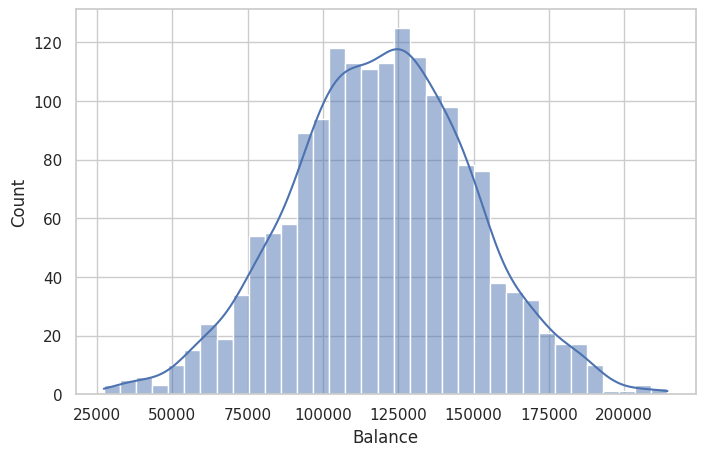

In [17]:
loyal_hist_plt = sns.histplot(loyal_customers["Balance"], kde=True, bins=35)

**Наблюдение**
+ видим аномальные количества счетов с балансом в интервале (110 000, 130 000)$
+ имеется s-образное поведение распределения на хвостах. Изгибы слева сильнее выражены, чем на хвосте справа


**Следующее действие**
> для выявления аномального поведения распределения на "хвостах", аппроксимирую фактическое распределение данных на теоретическое нормальное распределение точек данных

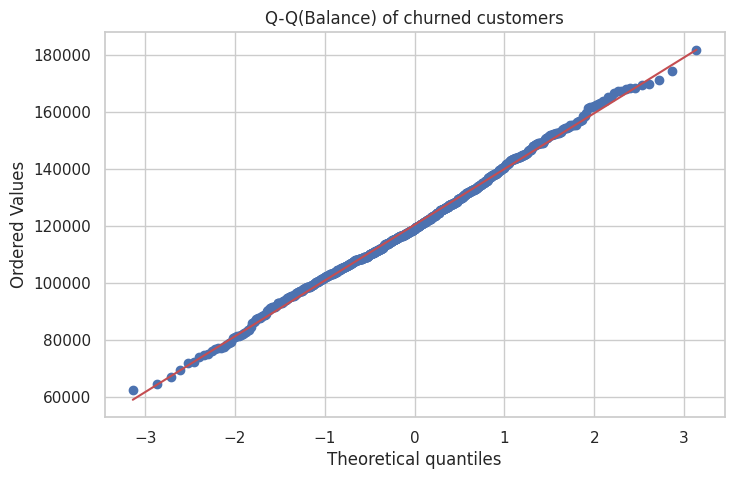

In [18]:
# ВИЗУАЛИЗАЦИЯ ПЛОТНОСТИ ТОЧЕК BALANCE из выборки balances_up_2500usd

# УШЕДШИЕ КЛИЕНТЫ
import scipy.stats as stats

stats.probplot(churn_customers["Balance"], dist="norm", plot=plt)
plt.title("Q-Q(Balance) of churned customers")
plt.show()

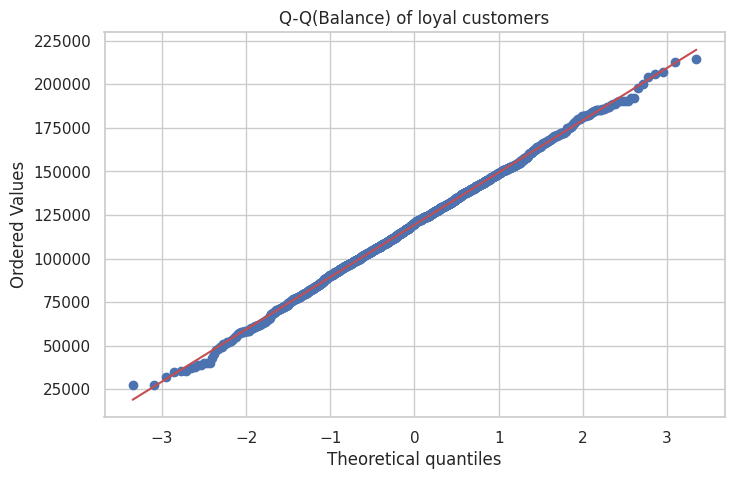

In [19]:
import scipy.stats as stats

# ЛОЯЛЬНЫЕ КЛИЕНТЫ
stats.probplot(loyal_customers["Balance"], dist="norm", plot=plt)
plt.title("Q-Q(Balance) of loyal customers")
plt.show()

**Наблюдение по графику "Q-Q(Balance)"**
⛔
* значения,начиная с ~ 62 500 $ по включительно 1 7625 00 $ лежат на прямой.
Этот массив покрывает 2 стандартных отклонения (> 90% данных)

* в левом и правом хвостах действительно подтверждается предположение об отклонении от нормального распределения



In [20]:
# РАСЧЕТНЫЕ ТЕСТЫ

# -------- D'Agostino-Pearson test --------
from scipy.stats import normaltest

# принимаю уровень значимости равным 5%
alpha_005 = .05
stat_churn, p_value_churn = normaltest(churn_customers["Balance"])
stat_loyal, p_value_loyal = normaltest(loyal_customers["Balance"])

print("Проверяемые гипотезы в группах ушедших и лояльных клиентов\n")

print("> H_0: распределение балансов клиентов Банка,\nна счете которых > 2.5k$, подчиняется нормальному распределению")
print("> H_1: распределение балансов клиентов Банка,\nна счете которых > 2.5k$, не подчиняется нормальному распределению")

print("> Ушедшие клинты: H_0 не подтверждается" if p_value_churn < alpha_005 else "\n>> Ушедшие клинты: H_0 может быть принята")
print("> Лояльные клинты: H_0 не подтверждается" if p_value_loyal < alpha_005 else ">> Лояльные клинты: H_0 может быть принята")

Проверяемые гипотезы в группах ушедших и лояльных клиентов

> H_0: распределение балансов клиентов Банка,
на счете которых > 2.5k$, подчиняется нормальному распределению
> H_1: распределение балансов клиентов Банка,
на счете которых > 2.5k$, не подчиняется нормальному распределению

>> Ушедшие клинты: H_0 может быть принята
>> Лояльные клинты: H_0 может быть принята


**Выводы** 🙅

* визуализация распределения выглядит приближенным к нормальному, однако с отклонениями от нормальности на краях
```
балансы > mean_balance + 2 * std_balance или балансы < mean_balance - 2 * std_balance
```
* по результатам проведенного статистического теста, p_value < alpha (уровень значимости приняла равным 5%), гипотеза H_0 о нормальности распределения не подтверждена

## Задание 3 (12 баллов)

Постройте тепловую карту по корреляционной матрице (Пирсона), сделайте выводы о линейной взаимосвязи между признаками.

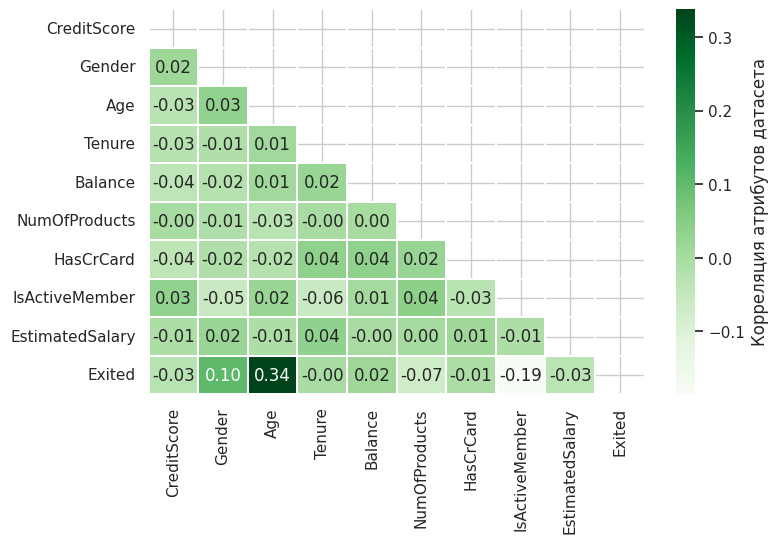

In [21]:
#НАЧАЛО ВАШЕГО РЕШЕНИЯ

# выбор атрибутов для исследования корреляции
select_attributes = ['CreditScore',

       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']
data_for_corrmatrix = df[select_attributes]

# трансформация категориальных атрибутов в числовые значения
## gender
data_for_corrmatrix.loc[:, "Gender"] = data_for_corrmatrix["Gender"].map({"Female":1, "Male":0})

# корреляционная матрица Пирсона
corr_pearson_matrix = data_for_corrmatrix.corr(method="pearson")

import numpy as np
import seaborn as sns
sns.heatmap(corr_pearson_matrix, cmap="Greens", annot=True, fmt=".2f", linewidths=.1, mask=np.triu(np.ones_like(corr_pearson_matrix, dtype=bool)),cbar_kws={"label":"Корреляция атрибутов датасета"})
plt.show()
#КОНЕЦ ВАШЕГО РЕШЕНИЯ

**Выводы**
+ линейная взаимосвязь между признаками
  + "Gender-Exited": подсвечена слабо-сильная положительная связь между полом и статусом лояльности:
  ```
  женщины проявляют большую лояльность Банку по сравнению с мужчинами
  ```
  + "Age-Exited": зафиксирована сильная положительная связь между возрастом и статусом лояльности
  ```
  чем старше клиент -- тем выше его склонность к лояльности Банку. Молодые люди чаще возрастных клиентов отказываются от услуг Банка
  ```

  + "IsActiveMember-Exited": показана сильная отрицательная связь между статусом активности клиента и статусом лояльности
  ```
  неактивные клиенты не склонны проявлять лояльность Банку и, наоборот
  ```

## Задание 4 (12 баллов)
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [ ]:
#НАЧАЛО ВАШЕГО РЕШЕНИЯ

#КОНЕЦ ВАШЕГО РЕШЕНИЯ

<Место для выводов>


## Задание 5 (13 баллов)
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Есть ли взаимосвязь между признаками?

In [ ]:
#НАЧАЛО ВАШЕГО РЕШЕНИЯ


#КОНЕЦ ВАШЕГО РЕШЕНИЯ

<Место для выводов>


## Задание 6 (13 баллов)
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

*Подсказка: процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).*

,Exited,Churned_%
Gender,,
Female,448,55.0
Male,366,45.0


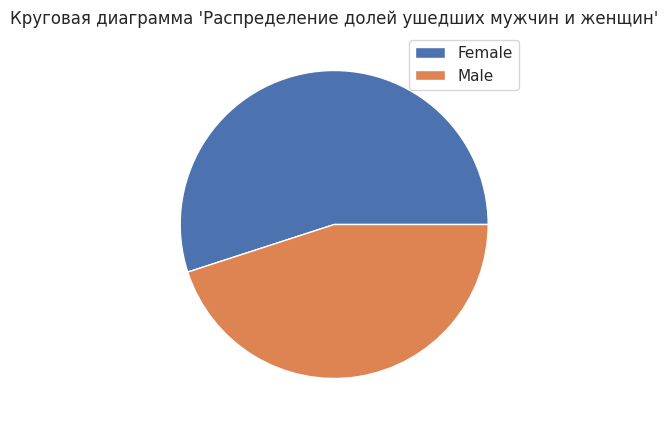

In [148]:
#НАЧАЛО ВАШЕГО РЕШЕНИЯ
churned_by_gender = df[["Gender", "Exited"]].query("Exited==1").pivot_table(index="Gender",
                                                        values="Gender",aggfunc="count")

for i in churned_by_gender.index:
  churned_by_gender.loc[i, "Churned_%"] = (churned_by_gender.loc[i, "Exited"] / churned_by_gender["Exited"].sum()).round(2) * 100

display(churned_by_gender)

import matplotlib.pyplot as plt

plt.pie(churned_by_gender["Churned_%"])
plt.title("Круговая диаграмма 'Распределение долей ушедших мужчин и женщин'")
plt.legend(["Female", "Male"])
plt.show()
#КОНЕЦ ВАШЕГО РЕШЕНИЯ

**Выводы**<br>
Доля ушедших женщин превосходит долю мужчин на 10 процентных пунктов, что показывает больший отток среди женского пола

## Задание 7 (13 баллов)
Как отток клиентов зависит от числа приобретенных у банка услуг? Для ответа на этот вопрос используйте столбчатую диаграмму.

In [106]:
#НАЧАЛО ВАШЕГО РЕШЕНИЯ
# Статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)
churned_numOfProd = df[["CustomerId", "Exited", "NumOfProducts"]].query("Exited==1")
pvt_table = churned_numOfProd.pivot_table(index="NumOfProducts",
                                          values="CustomerId",
                                          aggfunc="count")
pvt_table.rename(columns={"CustomerId":"NumOfCustomers"}, inplace=True)

# Вычисление доли ушедших клиентов в разрезе количества банковских продуктов
for num_prod in range(1, pvt_table.index.max()+1):
  pvt_table.loc[num_prod, "ChurnedCustomers_%"] = (pvt_table.loc[num_prod, "NumOfCustomers"] / pvt_table["NumOfCustomers"].sum()).round(2)*100
pvt_table


display(pvt_table)

# Столбчатая диаграмма
import plotly.express as px

px.bar(pvt_table,
       y='NumOfCustomers',
       width=1000, height=500,
       title="Диаграмма 'Количество ушедших клиентов в разрезе количества открытых ими банковских продуктов'",
       text=f"ChurnedCustomers_%")
#КОНЕЦ ВАШЕГО РЕШЕНИЯ

,NumOfCustomers,ChurnedCustomers_%
NumOfProducts,,
1,578,71.0
2,126,15.0
3,86,11.0
4,24,3.0


**Наблюдения**<br>
+ 71% от ушедших клиентов от ушедших клиентов имели один банковский продукт
+ 3% от ушедших клиентов пользовались четырьмя банковскими продуктами

**Вывод**<br>
Чем меньше клиент использовал банковских продуктов, тем легче он их закрывает и перестает быть клиентом Банка.

## Задание 8 (13 баллов)

Постройте сводную таблицу, где по строкам будет пол (`Gender`), по столбцам — число приобретенных услуг (`NumOfProducts`), а в ячейках — суммарное число ушедших клиентов в этой группе (`Exited`). Затем визуализируйте эту таблицу с помощью тепловой карты и сделайте выводы.

------------------------------------------------------------
NumOfProducts    1   2   3   4
Gender                        
Female         313  75  46  14
Male           265  51  40  10
------------------------------------------------------------
NumOfProducts           1          2          3          4
count            2.000000   2.000000   2.000000   2.000000
mean           289.000000  63.000000  43.000000  12.000000
std             33.941125  16.970563   4.242641   2.828427
min            265.000000  51.000000  40.000000  10.000000
25%            277.000000  57.000000  41.500000  11.000000
50%            289.000000  63.000000  43.000000  12.000000
75%            301.000000  69.000000  44.500000  13.000000
max            313.000000  75.000000  46.000000  14.000000
------------------------------------------------------------


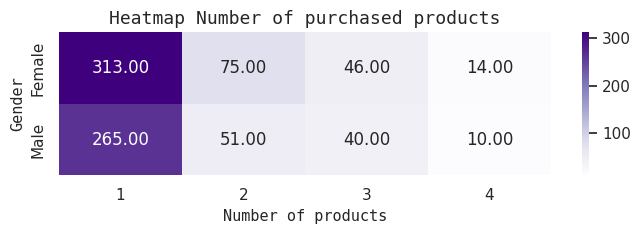

In [23]:
#НАЧАЛО ВАШЕГО РЕШЕНИЯ
churn_customers_df = df.query("Exited==1")[["Gender", "NumOfProducts", "Exited"]]
num_prod_purch_churn_cust = pd.pivot_table(churn_customers_df,
                       values="Exited",
                       index="Gender",
                       columns='NumOfProducts',
                       aggfunc="sum")

print("-"*60)
print(f"{num_prod_purch_churn_cust}")
print("-"*60)
print(f"{num_prod_purch_churn_cust.describe()}")
print("-"*60)

# Тепловая карта num_prod_purch_churn_cust
plt.figure(figsize=(7,2.5))
sns.heatmap(num_prod_purch_churn_cust, cmap='Purples', fmt=".2f", annot=True)
plt.title("Heatmap Number of purchased products", font='Monospace', size=13)
plt.xlabel("Number of products", font='Monospace', size=11)
plt.ylabel("Gender", font='Monospace', size=11)
plt.tight_layout()
plt.show()
#КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [33]:
femaleProd_maleProd = (num_prod_purch_churn_cust.loc["Female", :] / num_prod_purch_churn_cust.loc["Male", :]).mean()
femaleProd_maleProd

np.float64(1.300430077691454)

**Наблюдения**<br>

Cуммарное количество приобретенных банковских продуктов среди мужчин = 366 и женщин = 448.

В среднем, "соотношение банковские продукты, открытые мужчинами - банковские продукты, открытые женщинами" в среднем составляет 1:1.3

**Выводы**<br>
+ Такое соотношение может говорить о большей востребованности услуг банка среди женщин, чем среди мужчин.
+ Мужчины
  + **чем больше банковских продуктов** приобрел клиент, **тем ниже склонность к прекращению использования** услуг Банка.

+ Женщины
  + **чем больше банковских продуктов** приобрела клиентка, **тем ниже склонность к прекращению использования** услуг Банка;
  + прекратившие пользоваться услугами Банка женщины, приобрели большее количество банковских продуктов на каждом слое Number of products, чем ушедшие мужчины

